In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = xr.open_dataset("crocus-neiu-ceilometer-a1-202306110000.nc")

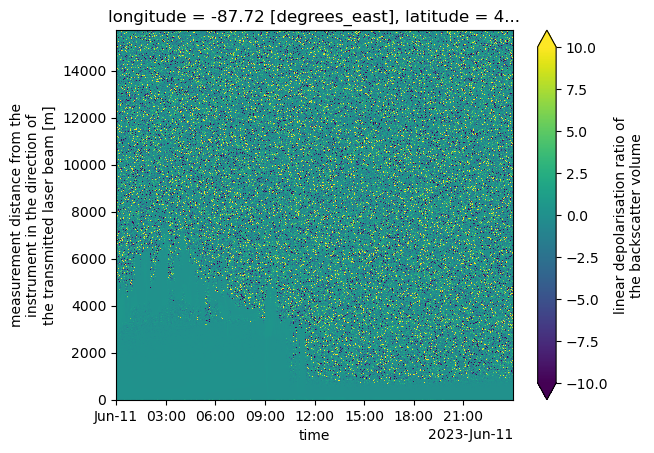

In [3]:
ds.linear_depol_ratio.plot(x='time', vmin=-10, vmax=10)

In [4]:
resampled = ds.resample(time='10T').mean()

/home/rskwarek/miniforge3/envs/cookbook-dev/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_grouper = pd.Grouper(


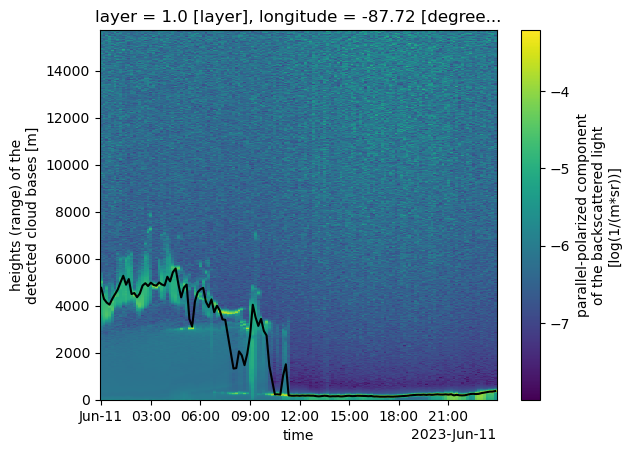

In [5]:
resampled.backscatter.plot(x='time')
resampled.cloud_base_heights.isel(layer=0).plot(color='k', x='time')

In [6]:
diff_backscatter = resampled.backscatter.diff("range")

In [7]:
ds.isel(layer=0)

<xarray.Dataset> Size: 113MB
Dimensions:                            (time: 1440, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 12kB 2023-06-11T...
  * range                              (range) float64 26kB 0.0 ... 1.572e+04
    layer                              float64 8B 1.0
    longitude                          float64 8B ...
    latitude                           float64 8B ...
Data variables: (12/27)
    cloud_base_heights                 (time) float64 12kB ...
    vertical_visibility                (time) float64 12kB ...
    p_pol                              (time, range) float32 19MB ...
    x_pol                              (time, range) float32 19MB ...
    beta_att                           (time, range) float32 19MB ...
    linear_depol_ratio                 (time, range) float32 19MB ...
    ...                                 ...
    receiver_gain                      (time) float32 6kB ...
    range_resolution                   (time) float32 6kB ...
    cloud_calibration_factor           (time) float64 12kB ...
    cloud_calibration_factor_user      (time) float64 12kB ...
    overlap_function                   (time, range) float32 19MB ...
    backscatter                        (time, range) float32 19MB ...
Attributes: (12/24)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF 1.10
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    site_ID:                        NEIU
    CAMS_tag:                       CMS-CL6-001
    datastream:                     neiu-ceilometer-a1
    datalevel:                      a1
    latitude:                       41.9804526
    longitude:                      -87.7196038

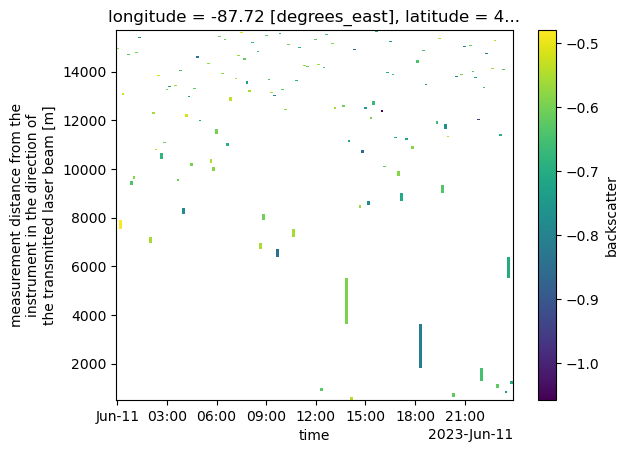

In [8]:
diff_backscatter.where(diff_backscatter == diff_backscatter.min("range"), drop=True).squeeze().plot(x='time')

(0.0, 2000.0)

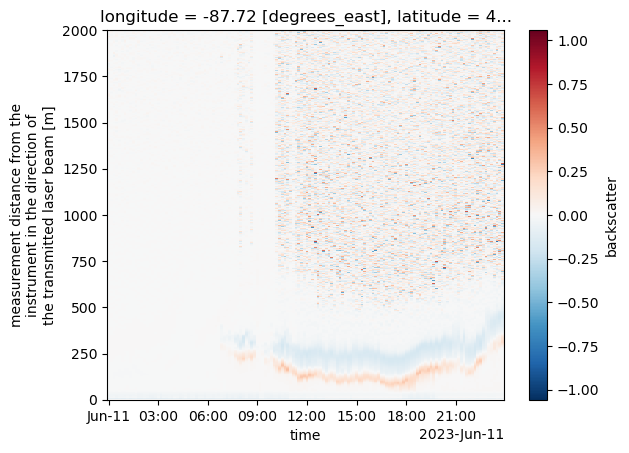

In [9]:
diff_backscatter.plot(x='time')
plt.ylim(0, 2000)

In [10]:
resampled.backscatter

<xarray.DataArray 'backscatter' (time: 144, range: 3276)> Size: 2MB
array([[-5.635204 , -5.7384443, -5.7780814, ..., -6.547723 , -6.6521897,
        -6.5702105],
       [-5.705317 , -5.80058  , -5.8284516, ..., -6.182173 , -6.182262 ,
        -5.954265 ],
       [-5.7051244, -5.7972937, -5.8200116, ..., -6.3633356, -6.2137103,
        -6.2480435],
       ...,
       [-4.7922273, -4.8573217, -4.8422556, ..., -6.390784 , -6.3461103,
        -6.3221297],
       [-4.758665 , -4.8252463, -4.812052 , ..., -5.9994354, -6.1977797,
        -6.33216  ],
       [-5.3183856, -5.3860283, -5.374494 , ..., -6.4058914, -6.318429 ,
        -6.2476387]], dtype=float32)
Coordinates:
  * range      (range) float64 26kB 0.0 4.8 9.6 ... 1.572e+04 1.572e+04
    longitude  float64 8B -87.72
    latitude   float64 8B 41.98
  * time       (time) datetime64[ns] 1kB 2023-06-11 ... 2023-06-11T23:50:00
Attributes:
    units:                      log(1/(m*sr))
    long_name:                  parallel-polarized component of the backscatt...
    averaging_time_in_seconds:  5

(0.0, 2000.0)

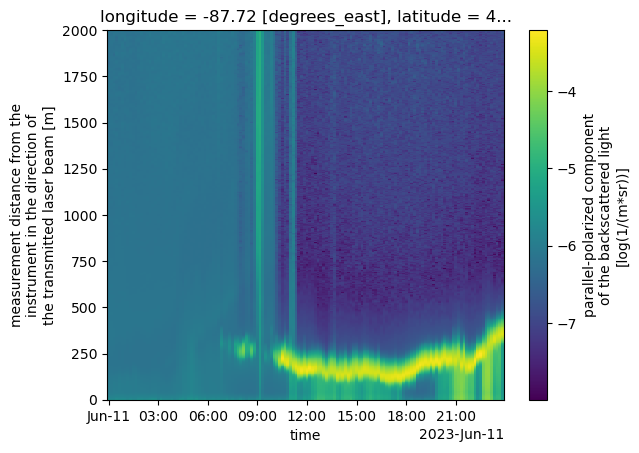

In [11]:
resampled.backscatter.plot(x='time')
plt.ylim(0, 2000)

(0.0, 2000.0)

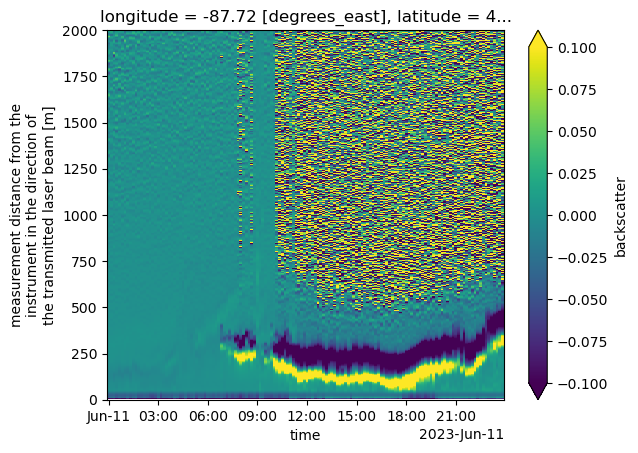

In [12]:
diff_backscatter.plot(x='time', vmin=-0.1, vmax=.1)
plt.ylim(0, 2000)